<a href="https://colab.research.google.com/github/wunderkimiko/heartattack/blob/main/Project_2_Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [353]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [354]:
# Load data
heartdf = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Project 2/heart.csv')
heartdf.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [355]:
# Summary of dataframe 
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [356]:
# Check for missing values
heartdf.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [357]:
# Number or rows and columns in the dataframe
heartdf.shape

(303, 14)

In [358]:
#Check for duplicates
heartdf.duplicated().sum()

1

In [359]:
# Show duplicate row
heartdf.loc[heartdf.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [360]:
# Drop duplicate data and keeping the first
heartdf.drop_duplicates(keep='first', inplace=True)

In [361]:
# Check that the duplicate row has dropped
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [362]:
# Show descriptive statistics of the dataframe
heartdf.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


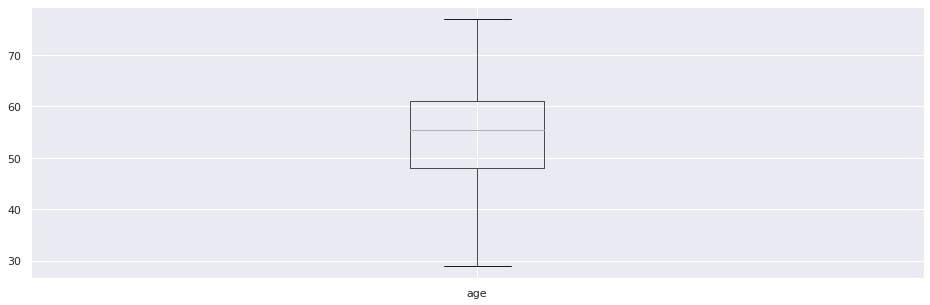

In [363]:
#Histogram and boxplots for univariate distributions of numerical variables
sns.set(rc={'figure.figsize':(16,5)})
heartdf.boxplot(column = 'age');

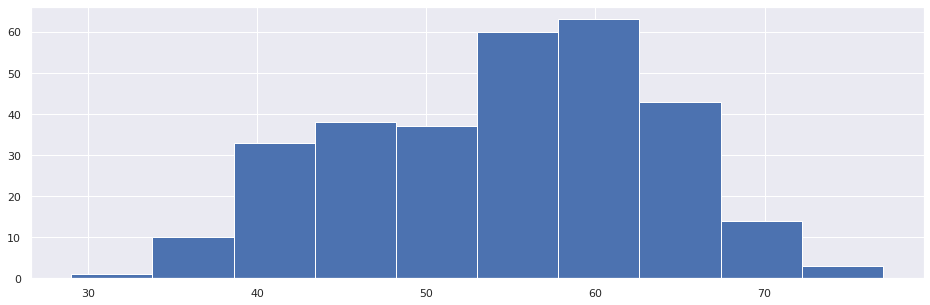

In [364]:
heartdf['age'].hist();

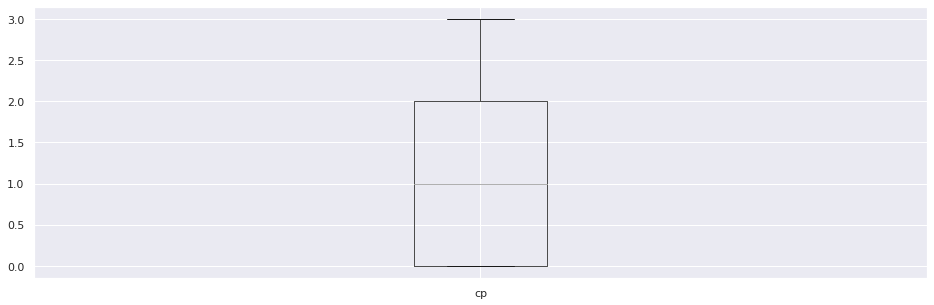

In [365]:
heartdf.boxplot(column = 'cp');

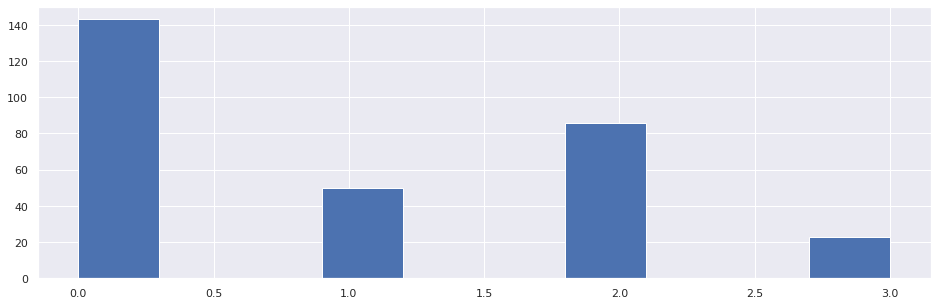

In [366]:
heartdf['cp'].hist();

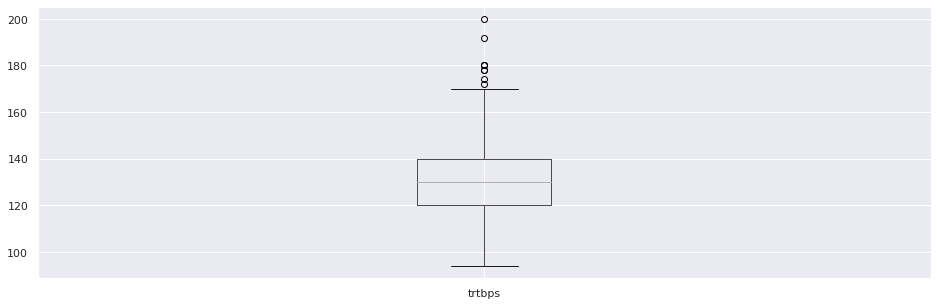

In [367]:
heartdf.boxplot(column = 'trtbps');

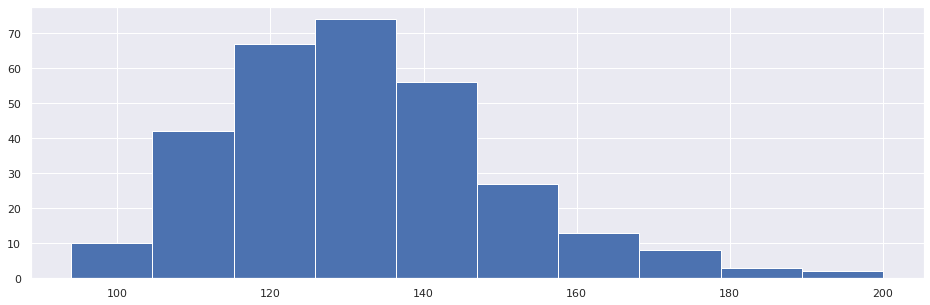

In [368]:
heartdf['trtbps'].hist();

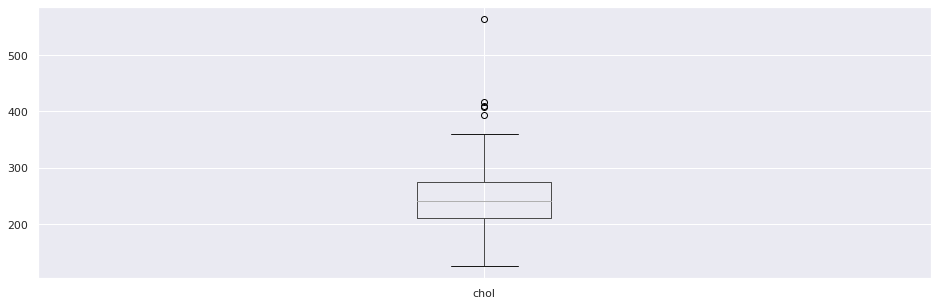

In [369]:
heartdf.boxplot(column = 'chol');

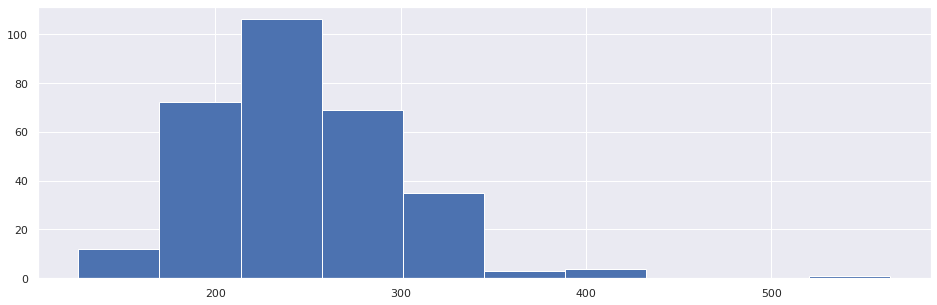

In [370]:
heartdf['chol'].hist();

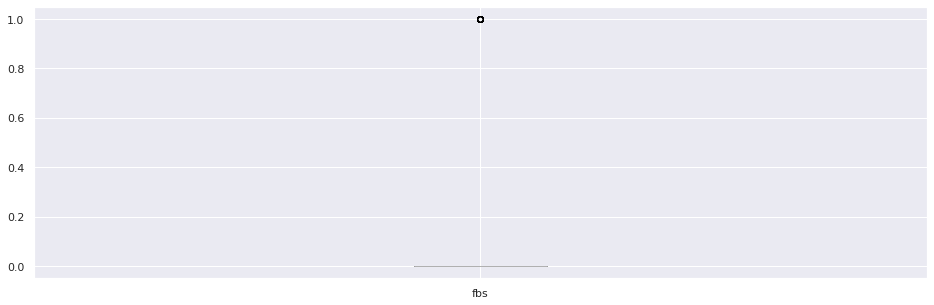

In [371]:
heartdf.boxplot(column = 'fbs');

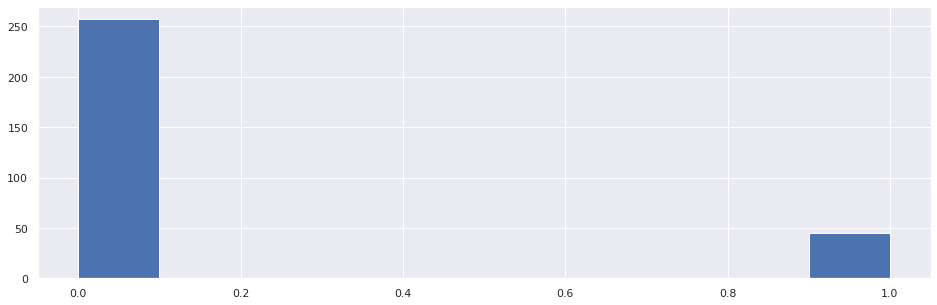

In [372]:
heartdf['fbs'].hist();

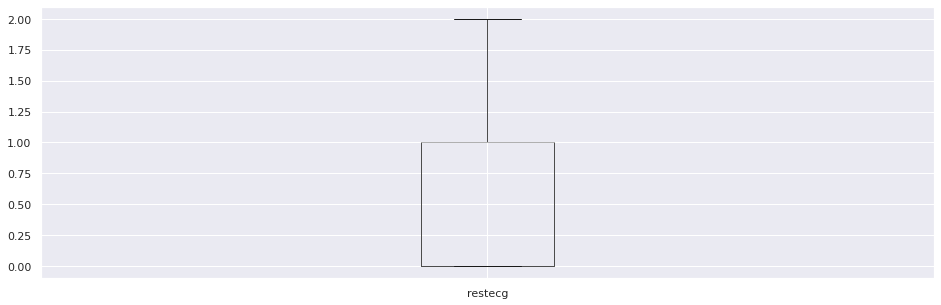

In [373]:
heartdf.boxplot(column = 'restecg');

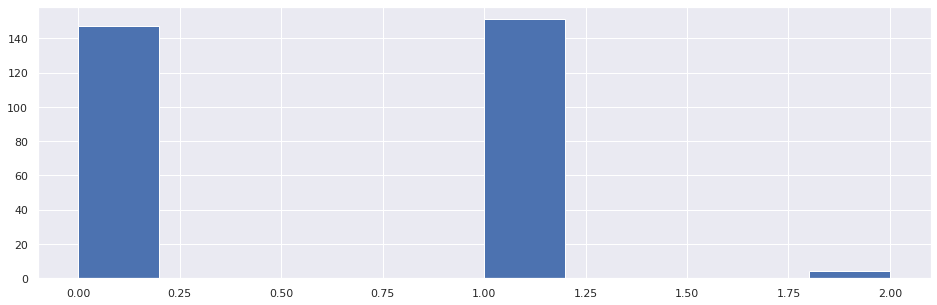

In [374]:
heartdf['restecg'].hist();

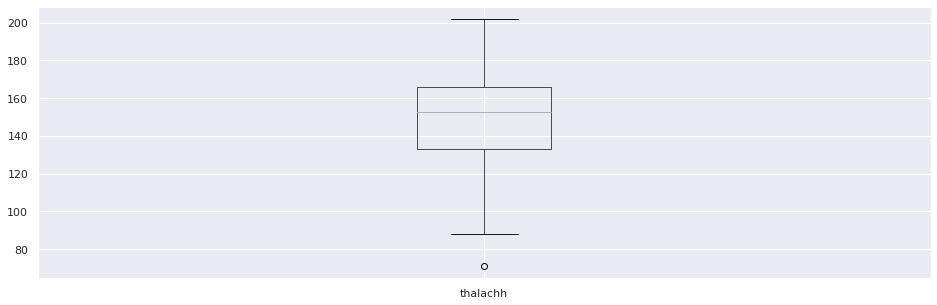

In [375]:
heartdf.boxplot(column = 'thalachh');

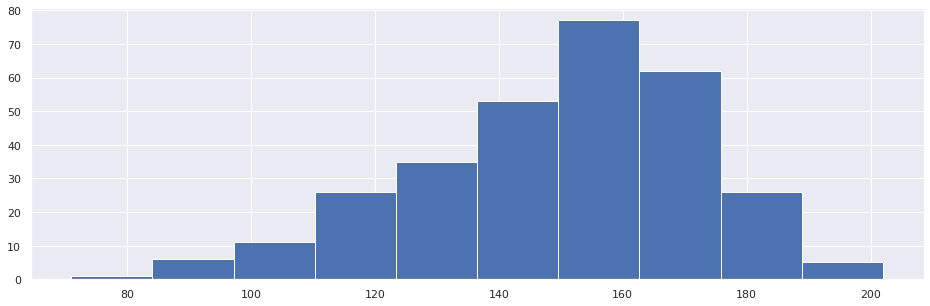

In [376]:
heartdf['thalachh'].hist();

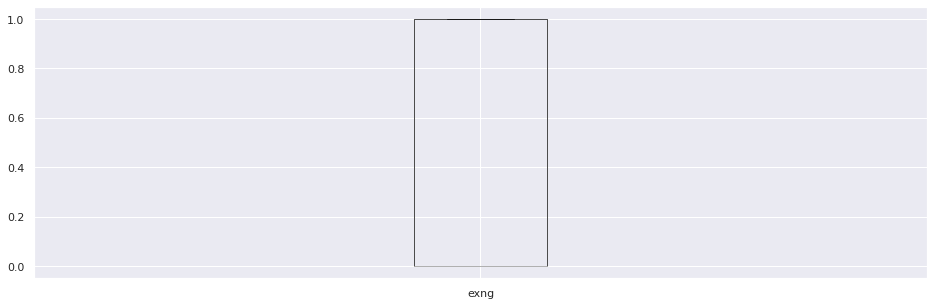

In [377]:
heartdf.boxplot(column = 'exng');

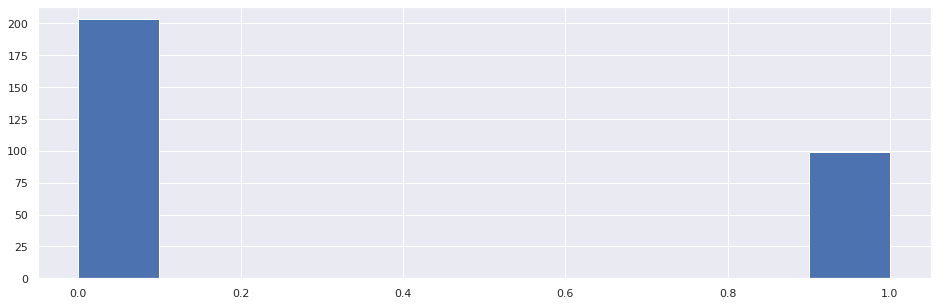

In [378]:
heartdf['exng'].hist();

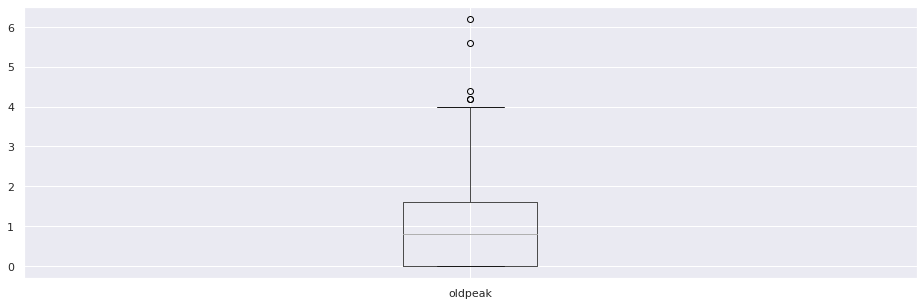

In [379]:
heartdf.boxplot(column = 'oldpeak');

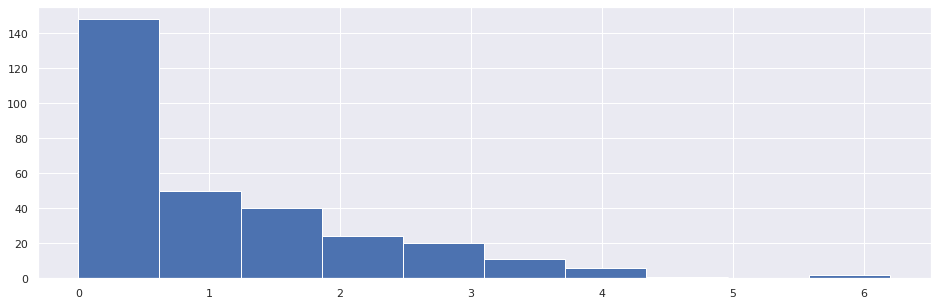

In [380]:
heartdf['oldpeak'].hist();

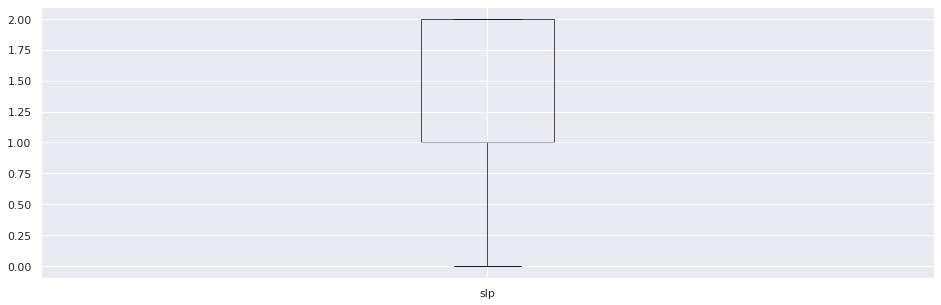

In [381]:
heartdf.boxplot(column = 'slp');

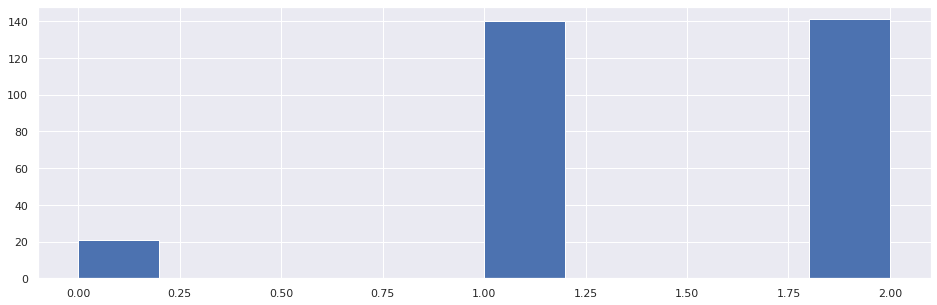

In [382]:
heartdf['slp'].hist();

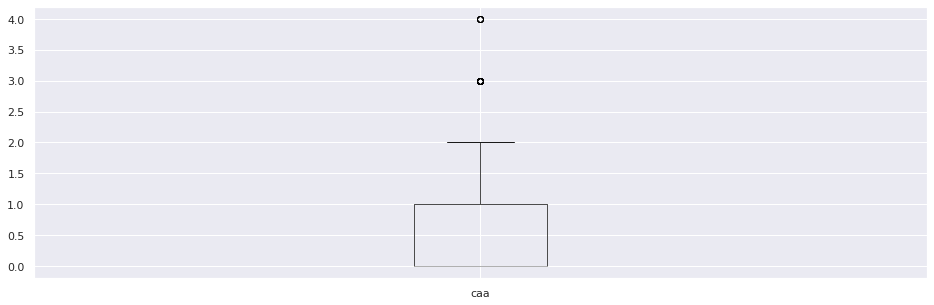

In [383]:
heartdf.boxplot(column = 'caa');

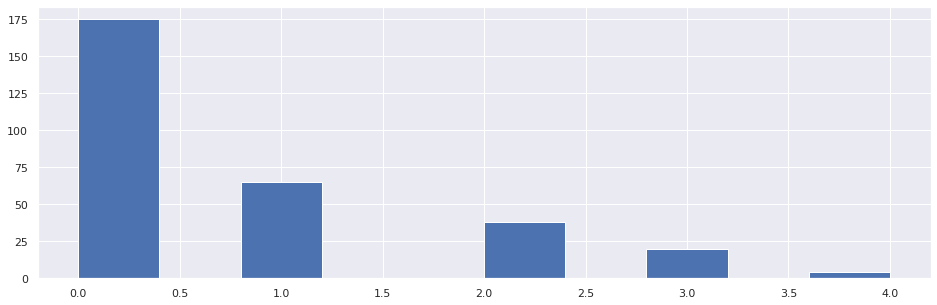

In [384]:
heartdf['caa'].hist();

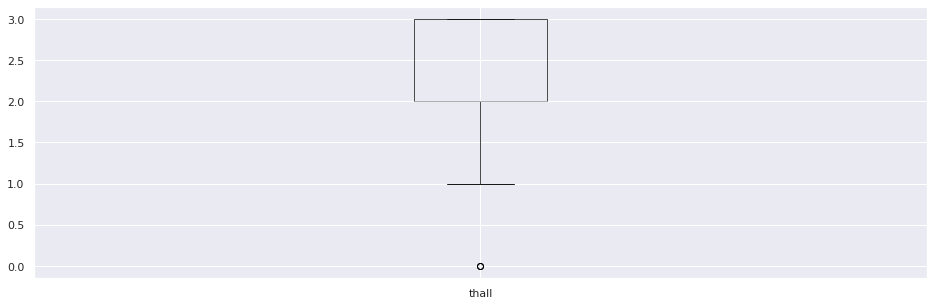

In [385]:
heartdf.boxplot(column = 'thall');

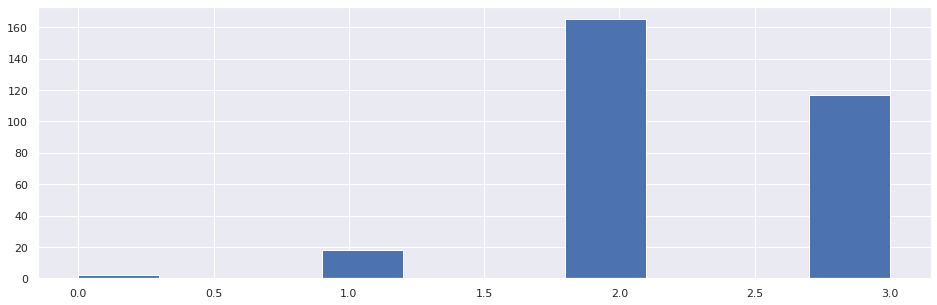

In [386]:
heartdf['thall'].hist();

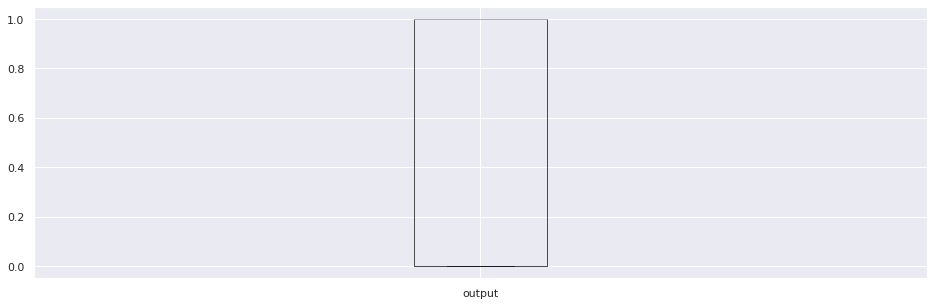

In [387]:
heartdf.boxplot(column = 'output');

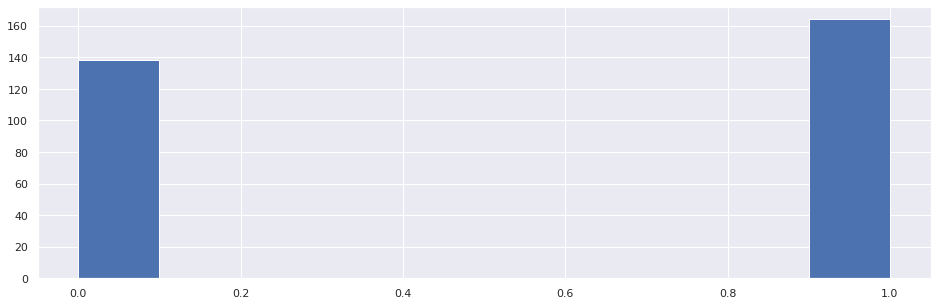

In [388]:
heartdf['output'].hist();

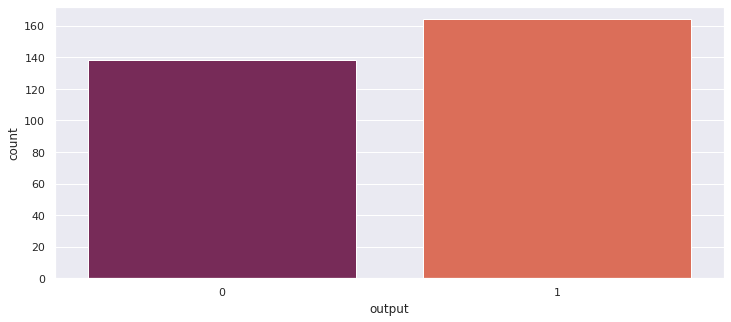

In [389]:
# Visualize target count
plt.figure(figsize = (12, 5))
sns.countplot (x = 'output', data = heartdf, palette= 'rocket');

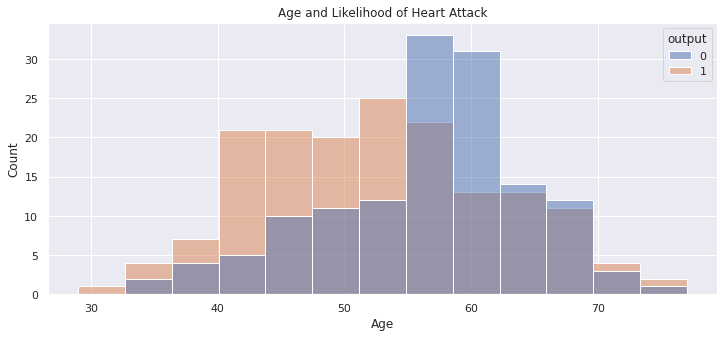

In [390]:
#Visualize some health risks with heart attack
plt.figure(figsize=(12,5))
sns.histplot(data = heartdf, x = 'age', hue = 'output');
plt.title('Age and Likelihood of Heart Attack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show();

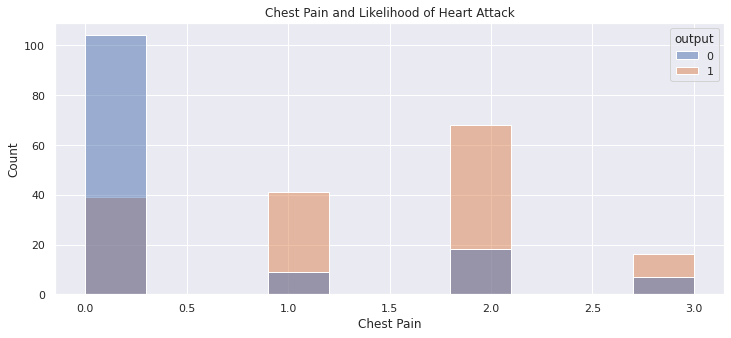

In [391]:
plt.figure(figsize=(12,5))
sns.histplot(data = heartdf, x = 'cp', hue = 'output');
plt.title('Chest Pain and Likelihood of Heart Attack')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.show();

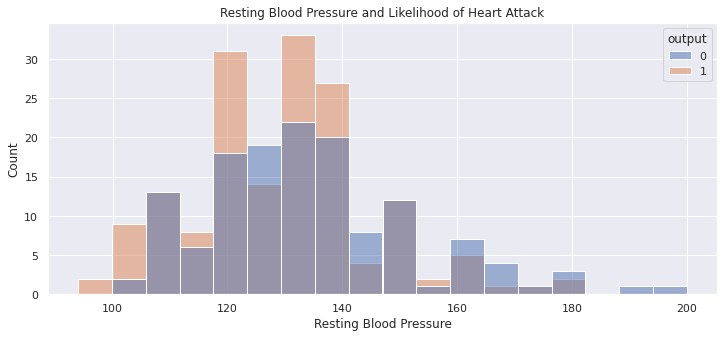

In [392]:
plt.figure(figsize=(12,5))
sns.histplot(data = heartdf, x = 'trtbps', hue = 'output');
plt.title('Resting Blood Pressure and Likelihood of Heart Attack')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.show();

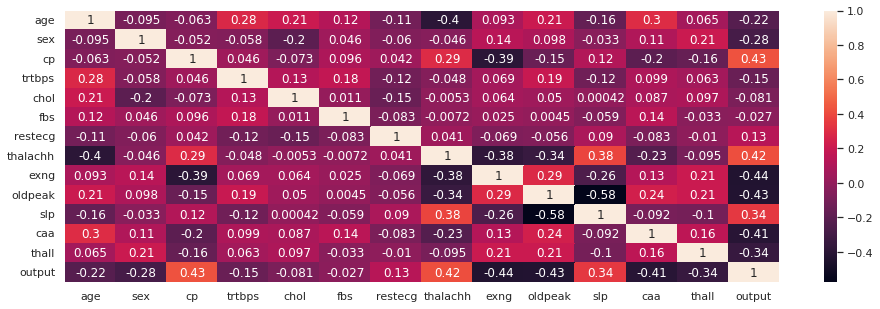

In [393]:
# Check for correlation
# .43 cp (chest pain) correlation with output (0, 1 : less or more likely to have a heart attack)
# .42 thalachh (maximum heart rate achieved) correlation with output (0, 1 : less or more likely to have a heart attack)
plt.figure(figsize=(16,5))
corr = heartdf.corr()
sns.heatmap(corr, annot = True);

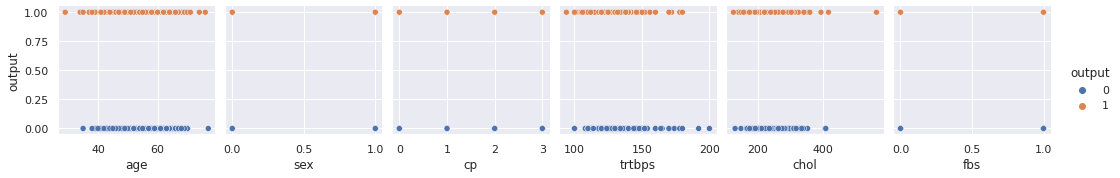

In [394]:
# Scatterplot for features and target
sns.pairplot(heartdf,
             x_vars = ['age','sex','cp','trtbps','chol','fbs'],
             y_vars =['output'],
             hue = 'output');

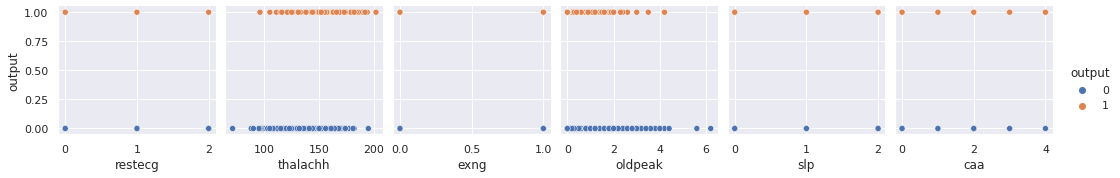

In [395]:
sns.pairplot(heartdf,
             x_vars = ['restecg','thalachh','exng','oldpeak','slp','caa'],
              y_vars =['output'],
             hue = 'output');

In [396]:
# Define target vector and features
# 'output' as in 0 or 1 (less or more likely to have a heart attack) will be my target
X = heartdf.drop(columns = 'output')
y = heartdf['output']

In [397]:
# Data Pre-Processing through pipeline
cat_feat= make_column_selector(dtype_include = 'object')
quant_feat = make_column_selector(dtype_include = 'number')
encoder = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler()
column_transformer = make_column_transformer((encoder, cat_feat), (scaler, quant_feat))
column_transformer

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff6ac551e90>),
                                ('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff6ad229d90>)],
                  verbose=False)

I will be trying different models to find the best fit and accurate model to predict heart attacks. Output is the target which is 0 or 1 meaning less or more likely to have a heart attack.

In [398]:
# Instantiate logistic regression model
logreg = LogisticRegression()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# Fitting and transform data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Training the model on the data, storing the information learned from the data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [399]:
# Logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Testing accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.8584070796460177
Testing accuracy: 0.8421052631578947


In [400]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.8893805309734514
Test accuracy: 0.881578947368421


In [401]:
# Bagged Tree
bt = BaggingClassifier()
bt.fit(X_train, y_train)
print('Training accuracy:', bt.score(X_train, y_train))
print('Test accuracy:', bt.score(X_test, y_test))

Training accuracy: 0.9867256637168141
Test accuracy: 0.8421052631578947


In [402]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.8421052631578947


I will be also using PCA on the data

In [403]:
# Instantiate PCA 
pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [404]:
# Transform X data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [405]:
X_train_pca.shape

(226, 12)

In [406]:
# Random forest PCA
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
print('Training accuracy:', rf.score(X_train_pca, y_train))
print('Testing accuracy:', rf.score(X_test_pca, y_test))

Training accuracy: 1.0
Testing accuracy: 0.8552631578947368


In [407]:
# Logistic regression PCA
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)
print('Training accuracy:', log_reg.score(X_train_pca, y_train))
print('Testing accuracy:', log_reg.score(X_test_pca, y_test))

Training accuracy: 0.8451327433628318
Testing accuracy: 0.8947368421052632


In [408]:
# KNN PCA
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
print('Training accuracy:', knn.score(X_train_pca, y_train))
print('Testing accuracy:', knn.score(X_test_pca, y_test))

Training accuracy: 0.8849557522123894
Testing accuracy: 0.868421052631579


In [409]:
# Bagged Tree PCA
bt = BaggingClassifier()
bt.fit(X_train_pca, y_train)
print('Training accuracy:', bt.score(X_train_pca, y_train))
print('Test accuracy:', bt.score(X_test_pca, y_test))

Training accuracy: 0.995575221238938
Test accuracy: 0.8552631578947368


Given the different accuracy scores, I will be going with the Logistic Regression since it has the best fitting accuracy scores and it is generally used for binary classification. The purpose of this project is predict heart attacks and the target is Output (0,1) which is a binary classification problem.

In [410]:
# 
log_reg.coef_

array([[-1.54212569,  0.35120857,  0.57372321,  0.3226402 ,  0.301143  ,
         0.03693735,  0.10403146,  0.27114922, -0.41425011, -0.08353214,
         0.08922696,  0.22653031]])

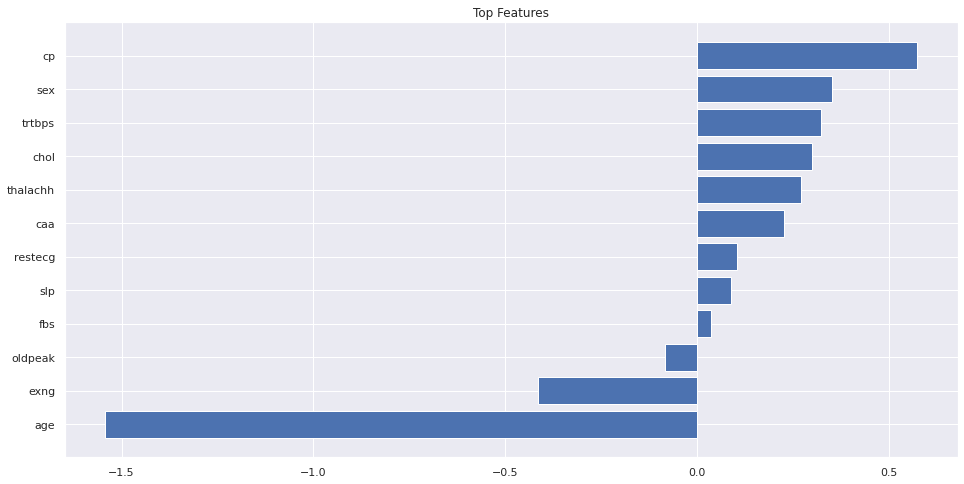

In [411]:
# Visualize top features
coef_df = pd.DataFrame(zip(X.columns, log_reg.coef_[0]), columns = ['Feature', 'Coef'])
coef_df.sort_values(by = 'Coef', inplace = True)

plt.figure(figsize = (16, 8))
plt.barh(coef_df['Feature'], coef_df['Coef'])
plt.title('Top Features');

In [412]:
# Visualize results of the model through confusion matrix
y_pred=logreg.predict(X_test)

In [413]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[29,  6],
       [ 6, 35]])

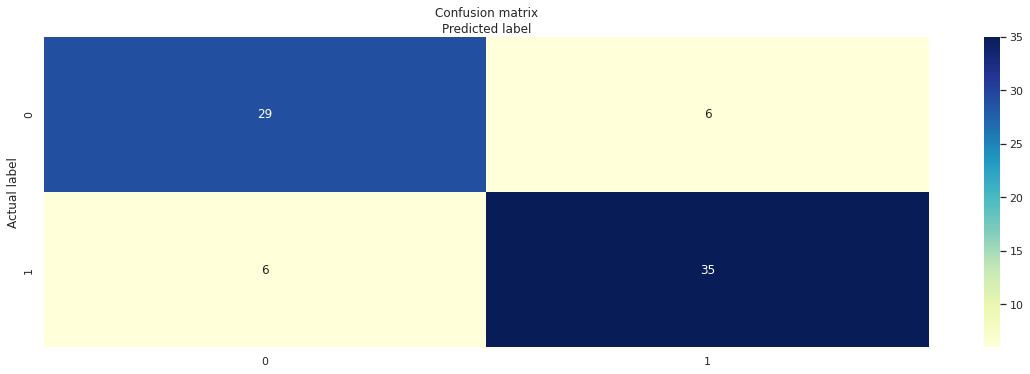

In [414]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [415]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))

Accuracy: 0.8421052631578947
Precision: 0.8536585365853658
Recall: 0.8536585365853658


Accuracy: The accuracy of the Logistic Regression model is 88.1%.

Precision: Logistic Regression model predicted true positives well at 88.1%.

Recall: Logistic Regression model can identify whether a person is more likely to have a heart attack 90.2% of the time.